In [10]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

base_dir = '../outputs_processed/'

files = os.listdir(base_dir)

for i, f in enumerate(files):
    if i == 0:
        df = pd.read_json(open(f'{base_dir}{f}'))
    else:
        df2 = pd.read_json(open(f'{base_dir}{f}'))
        df = pd.concat([df, df2])

def set_axis_style(ax, labels):
    ax.set_xticks(np.arange(1, len(labels) + 1), labels=labels)
    ax.set_xlim(0.25, len(labels) + 0.75)

In [8]:
df.columns

Index(['name', 'lat', 'lng', 'near_city', 'far_city', 'p_type', 'p_length',
       'state', 'city_b', 'lat_b', 'lng_b', 'dis'],
      dtype='object')

In [9]:
df.groupby(['p_type', 'p_length', 'state'])['dis'].mean()

p_type  p_length  state   
and     3-shot    no-state    2232.800946
                  state       1406.554766
close   3-shot    no-state    1525.598920
                  state        332.255408
far     3-shot    no-state    3256.252450
                  state       2531.015793
near    3-shot    no-state    2121.291422
                  state        311.004961
Name: dis, dtype: float64

In [5]:
df.loc[df.state == 'state']

,name,lat,lng,near_city,far_city,p_type,p_length,state,city_b,lat_b,lng_b,dis
0,"Albany, New York",42.65258,-73.75623,"New Haven, Connecticut","San Francisco, California",close,3-shot,state,"Montréal, Québec, Canada.",45.50884,-73.58781,317.656325
1,"Albany, New York",42.65258,-73.75623,"New Haven, Connecticut","San Francisco, California",close,3-shot,state,"Buffalo, New York.",42.88645,-78.87837,419.960931
2,"Albany, New York",42.65258,-73.75623,"New Haven, Connecticut","San Francisco, California",close,3-shot,state,"Woodstock, New York.",42.04092,-74.11820,74.201390
3,"Albany, New York",42.65258,-73.75623,"New Haven, Connecticut","San Francisco, California",close,3-shot,state,"\nSpringfield, Massachusetts.",42.10148,-72.58981,113.911315
4,"Albany, New York",42.65258,-73.75623,"New Haven, Connecticut","San Francisco, California",close,3-shot,state,"Burlington, Vermont.",44.47588,-73.21207,207.289559
...,...,...,...,...,...,...,...,...,...,...,...,...
236,"Albany, New York",42.65258,-73.75623,"New Haven, Connecticut","San Francisco, California",near,3-shot,state,"Fulton, New York.",43.05285,-74.34375,65.446270
237,"Albany, New York",42.65258,-73.75623,"New Haven, Connecticut","San Francisco, California",near,3-shot,state,"Binghamton, New York.",42.09869,-75.91797,188.368813
238,"Albany, New York",42.65258,-73.75623,"New Haven, Connecticut","San Francisco, California",near,3-shot,state,Westchester.,40.93121,-73.89875,191.557837
239,"Albany, New York",42.65258,-73.75623,"New Haven, Connecticut","San Francisco, California",near,3-shot,state,"Washington, D.C.",38.89511,-77.03637,500.694820


In [12]:
def preprocess_for_plot(df, state='state', prep='near'):
    return df.loc[(df.p_type == prep) & (df.state == state)].dis.to_list()

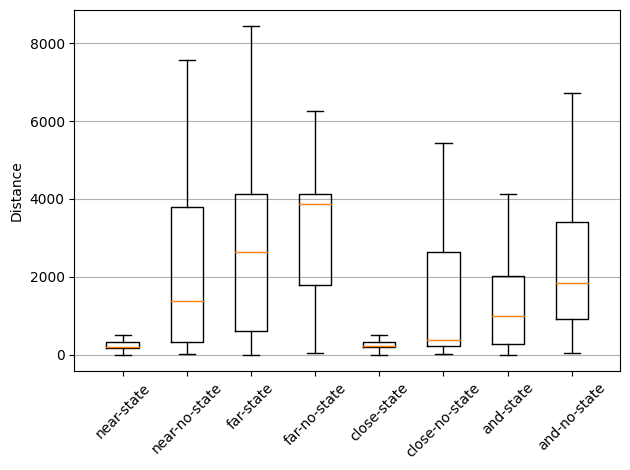

In [18]:

fig, axes = plt.subplots()

p = axes.boxplot(
    [
        preprocess_for_plot(df, 'state', 'near'),
        preprocess_for_plot(df, 'no-state', 'near'),
        preprocess_for_plot(df, 'state', 'far'),
        preprocess_for_plot(df, 'no-state', 'far'),
        preprocess_for_plot(df, 'state', 'close'),
        preprocess_for_plot(df, 'no-state', 'close'),
        preprocess_for_plot(df, 'state', 'and'),
        preprocess_for_plot(df, 'no-state', 'and'),
    ],
    showfliers=False
)
axes.yaxis.grid(True)
axes.set_ylabel('Distance')
labels = [
    'near-state',
    'near-no-state',
    'far-state',
    'far-no-state',
    'close-state',
    'close-no-state',
    'and-state',
    'and-no-state',
]
set_axis_style(axes, labels)
plt.xticks(rotation = 45)
plt.tight_layout()
plt.savefig("plots/predicted_distances.png", dpi=300)